<a href="https://colab.research.google.com/github/ZurMaD/crack-segmentation/blob/master/v1_2_DETECCION_FISURAS_VISION_20191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# DETECCIÓN Y REPORTE DE FISURAS MEDIANTE VISIÓN POR COMPUTADORA EN COMPONENTES DE MOTOR DE TRACCIÓN DE CAMIÓN MINERO KOMATSU 930 E4 USANDO PARTÍCULAS MAGNÉTICAS COMO ENSAYO NO DESTRUCTIVO

---

Paper: https://drive.google.com/open?id=1jkNjCIlvKNyXfkq8bYGxT4eknEYtQK7D9Er-XZLoiH4

## 0) Librerías, funciones generales y específicas

### Funciones generales


In [0]:
"""
Instalaremos algunas librerías para evitar el mal
funcionamiento en Jupyter Notebooks, si faltase 
alguna librería agregar aquí.
"""

!pip install opencv-python # For Morphology and Image Processing in General
!pip install numpy # For control of images as array
!pip install pandas # For select important crack
!pip install matplotlib # For plot 
!pip install ipywidgets # For clear options and plotting
!pip install scikit-image # For Image Control
!pip install statistics # For standart deviation
!pip install fpdf # For PDF report

# Install other if it's necesarry
# Colab have already installed a lot of these libraries 

from IPython.display import clear_output
import cv2
clear_output() # Borramos output
print("OpenCV Version: {}".format(cv2.__version__))

OpenCV Version: 3.4.3


### Funciones procesamiento de imagenes

In [0]:
"""
Las siguientes funciones se crearon para reducir la complejidad 
del código considerando el procesamiento que se realizá.

De haber cambios en alguna de estas funciones, más que todo
en las morfológicas se debe tener en cuenta que estas son 
usadas en diferentes partes del programa.
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import statistics
from google.colab.patches import cv2_imshow # For imshow in Colab

def load_image(image):
  x = cv2.imread(image)  
  imagenes.append(x)
  print("Se ha usado load_image().")
  return x

# DEPRECATED FUNCTION
# def load_image_color(image):
#   x=cv2.imread(image)
#   img_r=x[:,:,0]
#   img_g=x[:,:,1]
#   img_b=x[:,:,2]
#   imagenes.append(x)
#   imagenes.append(img_r)
#   imagenes.append(img_g)
#   imagenes.append(img_b)
#   print("Se ha usado load_image_color().")
#   return (x,img_r,img_g,img_b)

def load_image_color_fixed(image):  
  x=cv2.imread(image,cv2.IMREAD_COLOR)
  blue=x[:,:,0]#   print("Canal B")
  green=x[:,:,1]#   print("Canal G")
  red=x[:,:,2]#   print("Canal R")
  imagenes.append(x)
  imagenes.append(red)
  imagenes.append(green)
  imagenes.append(blue)
  print("Se ha usado load_image_color_fixed().")
  return (x,red,green,blue)
  
def invert_image(image):
  x=255-image
  imagenes.append(x)
  print("Se ha usado invert_image().")
  return x

def erosionar(image):
  x = cv2.erode(image,
                kernel,
                iterations = 1)
  imagenes.append(x)
  print("Se ha usado erosionar().")
  return x

def dilatar(image):
  x = cv2.dilate(image,
                 kernel,
                 iterations = 1)
  imagenes.append(x)
  print("Se ha usado dilatar().")
  return x

def rgb2hsi(image):
  x=cv2.cvtColor(image,
                 cv2.COLOR_BGR2HSV)
  imagenes.append(x)
  print("Se ha usado rgb2hsi().")
  return x

def rgb2gray(image):
  x = cv2.cvtColor(image,
                   cv2.COLOR_BGR2GRAY)
  imagenes.append(x)
  print("Se ha usado rgb2gray().")
  return x

def filtro_promedio(image):
  x = cv2.blur(image,
               (3,3))
  imagenes.append(x)
  print("Se ha usado filtro_promedio().")
  return x

def filtro_gaussiano(image):
  x = cv2.GaussianBlur(image,
                       (5,5),
                       0)
  imagenes.append(x)
  print("Se ha usado filtro_gaussiano().")
  return x

def filtro_mediano(image):
  
  x = cv2.medianBlur(image,
                     3)
  imagenes.append(x)
  print("Se ha usado filtro_median().")
  return x

def filtro_bilateral(image):
  x = cv2.bilateralFilter(image,
                          9,
                          75,
                          75)
  imagenes.append(x)
  print("Se ha usado filtro_bilateral().")
  return x

def opening(image):
  x= cv2.morphologyEx(image,
                      cv2.MORPH_OPEN,
                      kernel)
  imagenes.append(x)
  print("Se ha usado opening().")
  return x

def closing(image):
  x = cv2.morphologyEx(image,
                       cv2.MORPH_CLOSE,
                       kernel)
  imagenes.append(x)
  print("Se ha usado closing().")
  return x

def gradiente(image):
  x = cv2.morphologyEx(image,
                       cv2.MORPH_GRADIENT,
                       kernel)
  imagenes.append(x)
  print("Se ha usado gradiente().")
  return x

def resize(image,w,h):
  x=cv2.resize(image, (w, h)) 
  
  imagenes.append(x)
  print("Se ha usado resize().")
  return x

def img_resize(image,porcentaje):
  x=cv2.resize(image, (0,0),fx=porcentaje,fy=porcentaje) 
  
  imagenes.append(x)
  print("Se ha usado resize().")
  return x

def thr_adaptative(image):
  x = cv2.adaptiveThreshold(image,
                             255,
                             cv2.ADAPTIVE_THRESH_MEAN_C,
                             cv2.THRESH_BINARY,
                             11,
                             2)
  imagenes.append(x)
  print("Se ha usado thr_adaptative().")
  return x

def thr(image,thr=5):
  ret,x = cv2.threshold(image,
                        thr,
                        255,
                        cv2.THRESH_BINARY)
  imagenes.append(x)
  print("Se ha usado thr().")
  return x

def thr_otsu(image):
  ret,x = cv2.threshold(image,
                        0,
                        255,
                        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  imagenes.append(x)
  print("Se ha usado thr_otsu().")
  return x

def thr_otsu_gaussian(image):
  blur = cv2.GaussianBlur(image,
                          (5,5),
                          0)
  ret,x = cv2.threshold(blur,
                        0,
                        255,
                        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  imagenes.append(x)
  print("Se ha usado thr_otsu_gaussian().")
  return x

def ecualizar(image):
  x=cv2.equalizeHist(image)
  imagenes.append(x)
  print("Se ha usado ecualizar().")
  return x

def esqueletizar(image):
  
  element = cv2.getStructuringElement(cv2.MORPH_CROSS,
                                      (3,3))
  done = False  
  size = np.size(image)  
  skel = np.zeros(image.shape,np.uint8)
  while(not done):
      eroded = cv2.erode(image,
                         element)
      temp = cv2.dilate(eroded,
                        element)
      temp = cv2.subtract(image,
                          temp)
      skel = cv2.bitwise_or(skel,
                            temp)
      image = eroded.copy()
      zeros = size - cv2.countNonZero(image)
      if zeros==size:
          done = True
  imagenes.append(skel)
  print("Se ha usado esqueletizar().")
  return skel

def contornear(image):  
  x, contours, hierarchy = cv2.findContours(image, 
                                            cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
  y= cv2.drawContours(image,
                      contours,
                      -1, 
                      255,
                      1)  
  print("Se ha usado contornear().")
  return x, y

def mask(image,masked):
  x=cv2.bitwise_and(image,
                    masked)
  imagenes.append(x)
  print("Se ha usado mask().")
  return x

### Funciones selección de constantes

In [0]:
"""
Las siguientes funciones se realizaron con el objetivo de encontrar
parámetros específicos en el proyecto. Se usaron medios
interactivos para realizar esta labor.
"""
def select_edge_canny(thr1=5,thr2=5):
  x = cv2.Canny(image, # imagen
                thr1,  # threshold1
                thr2,  # threshold2
                 3)    # aperture size for the Sobel operator
  plt.imshow(x,
             cmap='gray')
  plt.show()
  plt.hist(image.ravel(),
           255)
  plt.show()  
  #   imagenes.append(x)
  # For select purposes we dont use append
  print("Se ha usado select_edge_canny().")
  return x

def select_2thr(thr1=5,thr2=5):  
  x=cv2.inRange(image, thr1, thr2)
  # For select purposes we don't use this sentence
  # image=cv2.bitwise_not(image, image2)    
  plt.imshow(x,
             cmap='gray')
  plt.show()
  plt.hist(x.ravel(),
          255)
  plt.show()
  print("Se ha usado select_2thr().")
  return x  

def select_1thr(thr=5):  
  ret,x=cv2.threshold(image,
                  thr,
                  255,
                  cv2.THRESH_BINARY)  
  plt.imshow(x,
            cmap='gray')
  plt.show()
  print("Se ha usado select_1thr().")
  return x

### Frecuencia de valores únicos en imagen

In [0]:
"""
Esta función nos indica la frecuencia de cada valor 
que aparece en un array. Es usado para calcular la
cantidad de pixeles blancos en una imagen binaria.

Esta función devuelve la frecuencia de cada
número en un arreglo (array) del tipo numpy.
"""
def array_frequency(array):
  unique_elements, counts_elements = np.unique(image, return_counts=True)
  # Si desea verificar la cantidad de valores porfavor 
  # des-comente las siguientes líneas.
  #   print(np.asarray((unique_elements, # Números existentes
  #                   counts_elements))) # Frecuencia de aparición de los números
  print("Se ha usado array_frequency().")
  return unique_elements, counts_elements

### Segmentación por desviación estándar

In [0]:
"""
Esta función segmenta mediante la desviación estándar de una región
si esta supera una desviación estándar máxima se transforma a cero.

Esta función depende de cada cuantos pixeles cuadrados se
separa la imagen y cuánta desviación máxima se soporta en cada
uno de estos recuadros.
"""
def segmentation_devstd(image,pixel_size=100,max_deviation=50):
  image_loaded=image.copy()
  rectangle=image.copy()
  ejex=len(image[:,1])
  ejey=len(image[1,:])
  max_pixelx=round(ejex/pixel_size)-1
  max_pixely=round(ejey/pixel_size)-1
  black=0
  for pixelx in range(max_pixelx): 
    for pixely in range(max_pixely):     
      x1=pixelx*pixel_size
      y1=pixely*pixel_size
      x2=(pixelx+1)*pixel_size
      y2=(pixely+1)*pixel_size
      
      # Extrae una parte de la imagen y la almacena en un buffer
      rectangle_buffer=image[x1:x2,y1:y2]
      
      # Calcula la desviación estándar del buffer
      rectangle_std_dev=np.std(rectangle_buffer) 
      
      # Si el buffer excede una desviación máxima
      # se cambia los valores de los pixeles a 255
      if rectangle_std_dev>max_deviation:
        rectangle[x1:x2,y1:y2]=black
      else:
        rectangle[x1:x2,y1:y2]=255
  print("Se ha usado segmentation_devstd().")
  return rectangle[0:max_pixelx*pixel_size,0:max_pixely*pixel_size]
# +image_loaded[0:max_pixelx*pixel_size,0:max_pixely*pixel_size]

"""
Esta función realiza la misma función que la anterior pero lo hace
mediante un entorno interactivo, se cambian algunas cosas.

ESTADO_ACTUAL = NO FUNCIONA
"""

clear_output() # Borramos output

### Imprimir todas las modificaciones de las imagenes.

In [0]:
"""
Imprime todas las image dentro del arreglo imagenes.
"""
def imprimir():
  print("Se va a imprimir todas las imagenes.")
  for i in range(len(imagenes)):
    plt.title(i)

    plt.subplot(1,2,1),
    plt.imshow(imagenes[i],
               cmap='gray')

    plt.subplot(1,2,2),
    plt.hist(imagenes[i].ravel(),
             256)
    plt.show()
    
    title='fisura_'+str(i)+'.jpg'
    plt.imshow(imagenes[i],cmap='gray')
    plt.savefig(title, format='png', dpi=1000)
    plt.show()

  print("Se ha usado imprimir().")

"""
Reinicia las variables y arreglos.
Se recomienda su uso para evitar confusiones
al usar notebooks virtuales
"""
def reiniciar():
  imagenes=[] # Conjunto de imágenes se imprimirán luego
  kernel = np.ones((3,3),np.uint8) # Usado en algoritmos

### Eliminar fecha de la imagen

In [0]:
"""
Algunas imagenes que se procesan contienen también
la fecha dentro de la imagen, esta función genera
un cuadro negro encima de la fecha para evitar revisar
esa zona.

La posición de la fecha tiene una posición fija. Se ha
considerado dimensiones proporcionales a las de la imagen
"""
def remove_date(image):  
  h=len(image[:,1])
  w=len(image[1,:])
  print ('Image size:',w,'x',h)
  print ('Deleting date info . . .')  
  x1=round(0.781*w)
  x2=round(0.936*w)
  y1=round(0.830*h)
  y2=round(0.890*h)    
  image[y1:y2,x1:x2]=0  
  print(str(x1)+':'+str(x2),str(y1)+':'+str(y2))  
  x=image  
  print("Se ha usado remove_date().")
  return x 

## 1) Función: Image Pre-Processing

A Technique based on Image Processing for Measuring Cracks in the Surface of
Concrete Structures

In [0]:
"""
Esta función sirve como pre-procesamiento
de las imágenes para poder detectar correctamente
las fisuras y encontrar los mejores parámetros de 
segmentación por tamaño de pixel cuadrado a evaluar y
la desviación estándar dentro de esta.
"""
def image_pre_procesamiento(image,pixel_size,max_deviation):  
  reiniciar()  
  original_image,r,g,b=load_image_color_fixed(image)  
  image=g
  array_frequency  
  image=segmentation_devstd(image,pixel_size,max_deviation)
  # TUNNING RECOMENDADO 10,22 o 4,40
  image=invert_image(image)  
#   image=dilatar(image)
#   image=erosionar(image)
  image=gradiente(image)  
  return image

## 2) Función: Procesamiento de imagen

In [0]:
"""
Esta función segmenta las fisuras eliminando ruido
"""
def image_procesamiento(image,gaussiano,mediano):  
  
  image=remove_date(image)  
  
  for m in range(gaussiano):
    image=filtro_gaussiano(image)  
  image=esqueletizar(image)  
  for m in range(mediano):
    image=filtro_mediano(image)  
  image=thr(image)  
  
  image=dilatar(image)
  image=dilatar(image)
  
#   x,y=contornear(image)
  return image

## 3) Función: Detectar fisuras

In [0]:
"""
Esta funcion detecta las fisuras y las convierte en objetos
al contabilizar una de ellas bajo conectividad de pixeles

https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python

-Labels is a matrix the size of the 
input image where each element has a value equal to its label.


0 0 0 0 0 0 
0 1 1 0 0 0
0 0 0 0 1 1
0 0 1 0 0 0 
0 0 0 0 0 0

TO

0 0 0 0 0 0
0 1 1 0 0 0
0 0 0 0 2 2
0 0 3 0 0 0
0 0 0 0 0 0


-Stats is a matrix of the stats that the function 
calculates. It has a length equal to the number of 
labels and a width equal to the number of stats.
It can be used with the OpenCV documentation for it: 

Statistics output for each label, including 
the background label, see below for available statistics. 
Statistics are accessed via stats[label, COLUMN] 
where available columns are defined below.

  cv2.CC_STAT_LEFT 
    The leftmost (x) coordinate which is the inclusive
    start of the bounding box in the horizontal direction.
  
  cv2.CC_STAT_TOP 
    The topmost (y) coordinate which is the inclusive 
    start of the bounding box in the vertical direction.
  
  cv2.CC_STAT_WIDTH 
    The horizontal size of the bounding box
  
  cv2.CC_STAT_HEIGHT
    The vertical size of the bounding box
 
  cv2.CC_STAT_AREA 
    The total area (in pixels) of the connected component
    
STATS - LEFT - TOP - WIDHT - HEIGHT - AREA
1       NUM.   NUM.   NUM.   NUM.     NUM.
2       NUM.   NUM.   NUM.   NUM.     NUM.
3       NUM.   NUM.   NUM.   NUM.     NUM.

Centroids is a matrix with the x and y locations 
of each centroid. The row in this matrix corresponds
to the label number.

"""
def crack2object(image,connectivity=8):
  # You need to choose 4 or 8 for connectivity type
  # Perform the operation
  output = cv2.connectedComponentsWithStats(image, 
                                            connectivity,
                                            cv2.CV_32S)
  num_labels = output[0]   
  labels = output[1]
  stats = output[2]
  centroids = output[3]  
  print("Se ha usado crack2object().")  
  return num_labels,labels,stats,centroids

## 4) Función: Selección de fisuras importantes

In [0]:
"""
Esta función dropea(elimina) las fisuras
que tienen un área pequeña y devuelve
el código asociado a dichas fisuras.
"""

import pandas as pd
from pandas import ExcelWriter

# Stas es arreglo que sale de crack2object

def drop_small_crack(num_labels,
                     stats,
                     max_area_ocupado,
                     min_area_total):  
  df=pd.DataFrame(stats)
  df=df.rename(columns={0: 'LEFT_X-INDEX',
                        1: 'TOP_Y-INDEX',
                        2: 'WIDTH',
                        3: 'HEIGHT',
                        4: 'AREA_BLANCO'})  

  
  df['AREA_TOTAL']=df['WIDTH']*df['HEIGHT']
  df['AREA_OCUPADO']=df['AREA_BLANCO']/df['AREA_TOTAL']
  df['COD']=df.index
   
  writer = ExcelWriter('step4_crack_data_frame_before.xlsx')
  df.to_excel(writer,'1')
  writer.save()
  
  df=df.drop(df.index[0])
  
  df=df.drop(df.index[df['AREA_OCUPADO']>max_area_ocupado])
  df=df.drop(df.index[df['AREA_TOTAL']<min_area_total])
  
  
  df=df.sort_values(by='AREA_BLANCO', ascending=False)  

  
  print("Los primeros elementos de la tabla son:")
  print(df['COD'][:5])
  
  writer = ExcelWriter('step4_crack_data_frame_after.xlsx')
  df.to_excel(writer,'1')
  writer.save()
  
  return df

#df=df.reset_index(drop=True)

## 5) Función: Separar fisuras en imagenes

In [0]:
"""
Esta función genera arrays (arreglos)
que dentro tienen imagenes binarias con el
código (número) asignado a cada fisura
"""
def list_crack(labels_values_cod):
  values=labels_values_cod.to_numpy()
  list_crack=[]
  img_temp=load_image(dir_original_image)
  h,w=img_temp.shape[:2]
  
  for element in values:
    crack_img = np.zeros((h,w),np.uint8)
    pixel_x,pixel_y=np.where(labels==element)
    try:
      crack_img[pixel_x,pixel_y]=255
    except:
      print("Index out... Lo arreglaremos.")
      print("Se generará ")
    list_crack.append(crack_img)    
  print("Se ha actualizado lista_crack[]")
  return list_crack

## 6) Imprimir todas las fisuras más grandes

In [0]:
"""
Esta función convierte la lista de fisuras
a arrays binarios ya que lista_fisuras
solo devuelve el código de la fisura.

Ejemplo:

0 0 0 0 0 0 
0 1 1 0 0 0
0 0 0 0 2 2
0 0 0 0 0 0 
0 0 0 0 0 0

TO
B=255
codigo=1
0 0 0 0 0 0
0 B B 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0 

codigo=2
0 0 0 0 0 0 
0 0 0 0 0 0
0 0 0 0 B B
0 0 0 0 0 0 
0 0 0 0 0 0
"""
# def list_crack2image(listaf):
#   for m in range(round(len(listaf)/2)-1):
#     if m==0: temp=listaf[0]
#     temp=np.add(np.add(listaf[m*2],listaf[m*2+1]),temp)
#   try:
#     plt.imshow(temp,cmap='gray')
#     plt.savefig('step6_allcrack.png', format='png', dpi=1000)
#     plt.show()
#     return temp
#   except:
#     print("Error:No se pudo hacer plot, prueba reduciendo area mínima")

def list_crack2image(lista_fisuras):
  for m in range(len(lista_fisuras)):
    if m==0:
      sum_temp=lista_fisuras[0]
    if m<(len(lista_fisuras)-1):
      temp=lista_fisuras[m+1]
      sum_temp=np.add(sum_temp,temp)
  try:
    plt.imshow(sum_temp,cmap='gray')
    plt.savefig('step6_allcrack.png', format='png', dpi=1000)
    plt.show()
    return sum_temp
  except:
    print("Error:No se pudo hacer plot, prueba reduciendo area mínima")

## 7) Generar JPG de lista de imagenes ARRAY

In [0]:
"""
Esta función junta todas las fisuras en imagenes separadas
y genera un reporte en PDF descargable en los archivos
o directorio.
"""
from fpdf import FPDF

def listimage2pdf(dir_original_image,lista,dpi):

  #Format can be (x,y) or 'A4' or similars
  resize_porcentaje=0.5
    
  ori_image=load_image(dir_original_image)
  ori_image_resized=img_resize(ori_image,resize_porcentaje)
  r = len(ori_image_resized)  
  c = len(ori_image_resized[0]) 
  
  plt.imshow(ori_image_resized,cmap='gray')
  plt.savefig('step7_ori.jpg',format='jpg',dpi=1000)  
  fig.show()
  
  pdf = FPDF(format=(c+10,r+10))

  pdf.set_font('Arial','B',round(r/20))
  print("Se ha usado listimage2pdf.")
  print("Empezando a crear PDF con fisuras...")
  
   
  pdf.add_page()
  pdf.image('step7_ori.jpg',0,0,c,r)
  pdf.cell(20,100,"Imagen Original Re-escalada")
  
  for i in range(len(lista)):
        
    img_resized=img_resize(lista[i],resize_porcentaje)
    r1 = len(img_resized)  
    c1 = len(img_resized[0])
    
    plt.imshow(img_resized,cmap='gray')
    file_name='temp'+str(i)+'.jpg'
    plt.savefig(file_name,format='jpg',dpi=1000) 
    pdf.add_page()
    pdf.image(file_name,0,0,c,r)
    plt.show()
    
    os.remove(file_name)

    page_content='Fisura N°'+str(i+1)
    pdf.cell(20,100,page_content)
    
  pdf.output("reporte_fisuras.pdf", "F")

## 8) CONFIGURACIÓN (file.jpg input)

In [0]:
"""
Se configuran las variables antes de ejecutar 
el código.
"""
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os


imagenes=[]
numero_fisuras=0
dir_original_image="2_2.jpg"
kernel = np.ones((5,5),np.uint8)
pixel_size=range(4,20,1)#30
max_deviation=range(5,60,1)#300

#Modificar esta constante, se puede mejorar esta selección
pixi=12 


x_list=[]
y_list=[]
z_list=[]
lista_fisuras=[]


"""
ANALIZAR EL MAPA DE SEGMENTACIÓN
"""
map_seg_3d=0
map_seg_2d=1

"""
ELECCIÓN AUTOMÁTICA DE SEGMENTACIÓN
"""
clear_output() # Borramos output

### Mapa de segmentación 3D

Genera los cálculos necesarios para poder plotear la siguiente imagen.<p>
<p>
  
![map_seg_3d](https://i.imgur.com/R33Bfx0.png)
  
<p>
**La imagen es referencial**

In [0]:
"""
Los valores de map_seg_3d se modifican en la sección de
"CONFIGURACION"

map_seg_3d=0 NO EJECUTA
map_seg_2d=1 SÍ EJECUTA
"""
if map_seg_3d==1:  
  for x in pixel_size:
    for y in max_deviation:
      print (x,y)
      image=image_pre_procesamiento(dir_original_image,x,y)
      numeros, frecuencias= array_frequency(image)

      try:
        freq_255=frecuencias[1] # Puede que no exista color blanco
      except:
        freq_255=0

      x_list.append(int(x))
      y_list.append(y)     
      z_list.append(freq_255)

  x_list_np=np.asarray(x_list)
  y_list_np=np.asarray(y_list)
  z_list_np=np.asarray(z_list)
  #Normalizamos las celdas de color blanco
  a=(z_list_np-np.min(z_list_np))/np.ptp(z_list_np)

  X=np.asarray(x_list_np)
  Y=np.asarray(y_list_np)
  Z=np.asarray(a)

  len_pixel_size=len(pixel_size)
  len_max_deviation=len(max_deviation)

  x_reshaped=np.reshape(X,(len_max_deviation,len_pixel_size))
  y_reshaped=np.reshape(Y,(len_max_deviation,len_pixel_size))
  z_reshaped=np.reshape(Z,(len_max_deviation,len_pixel_size))

  color_t=np.arange(len(X))

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # SURFACE

  # ax.plot_surface(x_reshaped, y_reshaped, z_reshaped) 

  #SCATTER
  ax.scatter(x_reshaped, y_reshaped, z_reshaped, c=color_t, marker='o')

  ax.set_xlabel('Tam. de pix.')
  ax.set_ylabel('Máx desv. por celda rect.')
  ax.set_zlabel('Normalizado pix. blanc.')
  print("Se ha usado map_seg_3d=1")
  name_file='step8_map_seg_3d.png'
  plt.savefig(name_file, format='png', dpi=1000)
  print("Se ha guardado una imagen con nombre:",name_file)
  plt.show()

### Mapa de segmentación 2D



Poner 1 si quieres plotear en pixel size constante, max deviation vs iteracion <p>

  ![texto alternativo](https://i.imgur.com/HgpQPkl.png)
  <p>
      La imagen es referencial<p>

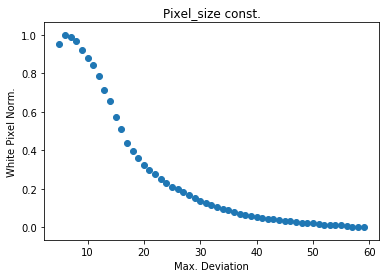

Se ha guardado una image con nombre: step8_map_seg_2d.png


In [0]:
"""
Los valores de map_seg_3d se modifican en la sección de
"CONFIGURACION"

map_seg_2d=0 NO EJECUTA
map_seg_2d=1 SÍ EJECUTA
"""
if map_seg_2d==1:
  for m in max_deviation:
    image=image_pre_procesamiento(dir_original_image,pixi,m)
    numeros, frecuencias= array_frequency(image)
    
    try:
      freq_255=frecuencias[1] # Puede que no exista color blanco
    except:
      freq_255=0
    print("----------------------------------------------------")
    print("ITER:",m,"PIXSIZE:",pixi,"WHITEPIX:",freq_255)
    #Ponemos los valores en listas
    x_list.append(int(m))
    y_list.append(freq_255)

  x_list_np=np.asarray(x_list)
  y_list_np=np.asarray(y_list)

  #Normalizamos las celdas de color blanco
  a=(y_list_np-np.min(y_list_np))/np.ptp(y_list_np)

  X=np.asarray(x_list_np)
  Y=np.asarray(a)

  color_t=np.arange(len(X))

  fig = plt.figure()
  ax = fig.add_subplot(111)

  #SCATTER
  ax.scatter(X, Y)
  ax.set_xlabel('Max. Deviation')
  ax.set_ylabel('White Pixel Norm.')
  ax.set_title('Pixel_size const.')
  
  clear_output() # Borramos output
  name_file='step8_map_seg_2d.png'
   
  plt.savefig(name_file, format='png', dpi=1000)
  plt.show()
  print("Se ha guardado una image con nombre:",name_file) 

### Seleccionando el mejor threshold 2D

Luego de calculado el mejor threshold se selecciona la mejor desviación estándar con la ayuda de facilidad de cálculo de computo<p> La imagen es referencial <p>

![Ga](https://i.imgur.com/dwvLQfP.png)



In [0]:
yfunc=y_list_np
xfunc=x_list_np

y1=np.amax(yfunc)
y2=yfunc[-1]

y1_index=np.where(yfunc==y1)
y2_index=np.where(yfunc==y2)

# print (y1_index[0],y2_index[0])

x1=xfunc[y1_index]
x2=xfunc[y2_index]

print ('Y:',yfunc)
print ('X:',xfunc)
print ('y1:',y1,'y2:',y2)
print ('x1:',x1,'x2:',x2)


rangoX=np.where((yfunc/y1)>0.245) # Best 0.225

best_max_deviation=rangoX[-1][-1]
best_pixel_size=4

print ("Best max parameters")
print ("Best max dev.:",best_max_deviation,"Best pixel size", best_pixel_size)

Y: [313808 328496 324912 318640 303088 290288 278368 261744 238608 219504
 194656 173536 152208 138576 126128 114928 106880 100080  92960  86288
  79792  75712  70768  66016  61392  56832  53200  50272  46416  42928
  41264  38064  35168  32816  31040  30208  28688  27472  26624  25216
  23888  22848  21984  20928  20336  19680  18432  17776  17088  16896
  16704  15568  14432  13472  13376]
X: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59]
y1: 328496 y2: 13376
x1: [6] x2: [59]
Best max parameters
Best max dev.: 19 Best pixel size 4


## 9) MAIN

Se ha usado load_image_color_fixed().
Se ha usado segmentation_devstd().
Se ha usado invert_image().
Se ha usado gradiente().


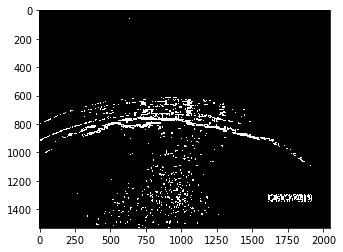

Image size: 2044 x 1532
Deleting date info . . .
1596:1913 1272:1363
Se ha usado remove_date().
Se ha usado filtro_gaussiano().
Se ha usado filtro_gaussiano().
Se ha usado filtro_gaussiano().
Se ha usado esqueletizar().
Se ha usado filtro_median().
Se ha usado thr().
Se ha usado dilatar().
Se ha usado dilatar().


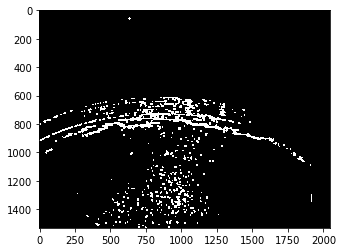

Se ha usado crack2object().
Los primeros elementos de la tabla son:
47    47
90    90
76    76
11    11
99    99
Name: COD, dtype: int64
(8, 8) fisuras encontradas
Se ha usado load_image().
Se ha actualizado lista_crack[]


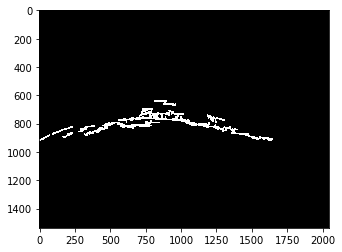

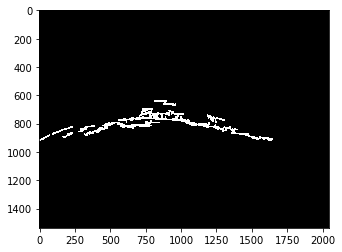

Se ha usado load_image().
Se ha usado resize().
Se ha usado listimage2pdf.
Empezando a crear PDF con fisuras...
Se ha usado resize().


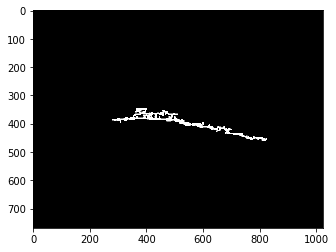

Se ha usado resize().


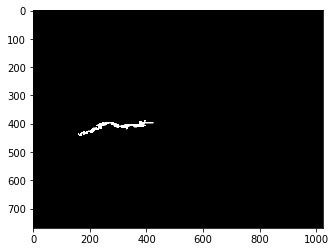

Se ha usado resize().


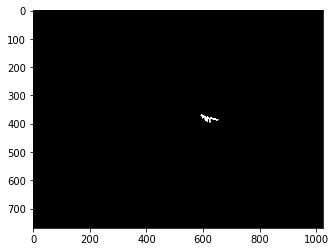

Se ha usado resize().


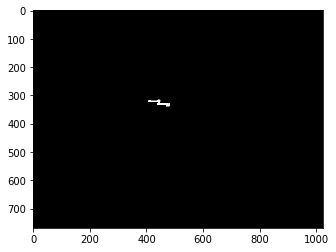

Se ha usado resize().


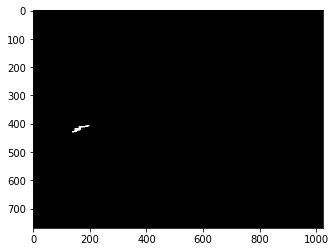

Se ha usado resize().


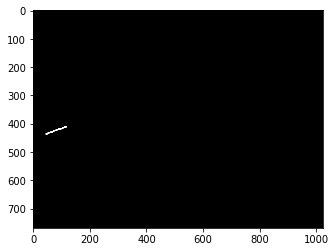

Se ha usado resize().


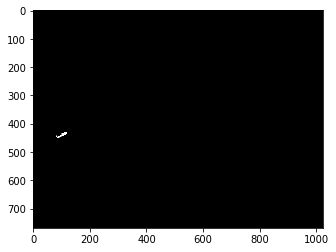

Se ha usado resize().


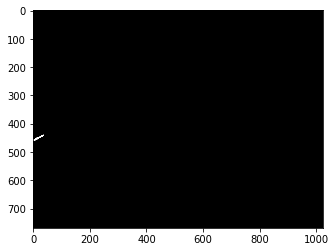

In [0]:
"""
  MAIN
"""
imagenes=[]

if __name__ == "__main__":
  """
  Se pre-procesa la imagen con desviación estándar
  """
  image=image_pre_procesamiento(dir_original_image,
                                best_pixel_size,
                                best_max_deviation) 
  
  plt.imshow(image,cmap='gray')
  plt.savefig('step9_ImgPrePro.png', format='png', dpi=1000)
  plt.show()
  """
  Se procesa la imagen eliminando ruido general y
  sacando el esqueleto de todas las fisuras.
  Luego se hace el contorno de cada esqueleto
  """
  image=image_procesamiento(image,gaussiano=3,mediano=1)
  
  plt.imshow(image,cmap='gray')
  plt.savefig('step9_ImgPro.png', format='png', dpi=1000)
  plt.show()
  
  
  """
  Ahora cada fisura se segmenta con la conectividad
  dentro de la imagen binaria y se pasa a un Dataframe
  para un filtrado más específico
  """
  num_labels, labels, stats, centroids=crack2object(image)
  
  """
  Se quitan las fisuras pequeñas ya que no representan
  daños o pueden ser ruido aún no filtrado. Se escoje las
  fisuras más grandes y se reporta.
  """
  labels_values=drop_small_crack(num_labels,
                                 stats,
                                 max_area_ocupado=0.4,
                                 min_area_total=1000)
  labels_values_cod=labels_values['COD']
  print(labels_values.shape,"fisuras encontradas")
  """
  Se crea una lista con las fisuras, cada una es un arreglo
  separado, entonces se guarda en un arreglo llamado list_crack  
  """
  lista_fisuras=list_crack(labels_values_cod)
  
  
  """
  Se genera la imagen final con las fisuras acopladas en 
  una sola, la función devuelve en un array
  las imagenes con la prioridad de fisura encontrada.
  
  Ejem:
  
  lista_fisuras[0] tendría la fisura con área más grande
  área de width x heigh no de área blanco dentro ese rectángulo.  
  """
  
  all_cracks=list_crack2image(lista_fisuras)
  
  plt.imshow(all_cracks,cmap='gray')
  plt.savefig('ste9_allcracks.png', format='png', dpi=1000)
  plt.show()
  
  """
  Con las imagenes en arrays se genera un reporte en pdf.
  """
  
  listimage2pdf(dir_original_image,lista_fisuras,dpi=1000)
  
  

In [0]:
#imprimir()